# Gaussian XOR Experiments

In the following experiments, we test our three streaming tree implementations (**Stream Decision Tree**, **Stream Decision Forest**, and **Synergistic Forest**) on variations of the Gaussian XOR classification task and benchmark against existing popular streaming tree algorithms. We utilize a customized fork of scikit-learn with an added `partial_fit` function. For additional implementation details and pseudocode see: [Streaming Decision Trees and Forests](https://arxiv.org/abs/2110.08483)

## Benchmark Classifiers 
We compare SDT, SDF, and SynF to two popular streaming classifiers:
- [Hoeffding Tree Classifier](https://riverml.xyz/latest/api/tree/HoeffdingTreeClassifier/) 
- [Mondrian Forest Classifier](https://scikit-garden.github.io/api/#skgardenmondrianmondrianforestclassifier)




In [2]:
import sys
import numpy as np

sys.path.append("../benchmarks/code/")
import xor_functions as fn

**Note:** This notebook uses functions stored within `benchmarks/code/xor_functions.py`

### Running the Experiments
**Note:** It is not necessary to run the experiments to visualize the results. Results are available in `benchmarks/results`.
However, if you would like to run the experiments you can use the following commands: 

**Run all classifier benchmarks for Experiment 1: XOR, R-XOR, XOR**
```
cd benchmarks/code
python r_xor.py -all
```
**or run specified classifier benchmarks for Experiment 1: XOR, R-XOR, XOR**
```
cd benchmarks/code
python r_xor.py -ht -sdf
```
**Classifiers:**

Hoeffding Tree: `-ht`, Mondrian Forest: `-mf`, Stream Decision Tree: `-sdt`, Stream Decision Forest: `-sdf`, Synergistic Forest: `-synf`

**For Experiment 2: XOR, XNOR, XOR replace `r_xor.py` with `xnor.py`**

## Experiment 1: Gaussian XOR and Gaussian R-XOR Simulated Data
In experiment 1, we use Gaussian XOR and Gaussian R-XOR simulated data. Gaussian R-XOR has the same distribution as Gaussian XOR, but with the class labels rotated 45 degrees. We introduce 750 samples of XOR data, followed by 750 samples of R-XOR data, and then an additional 750 samples of XOR data. Data are introduced in batches of 25 samples at a time. 

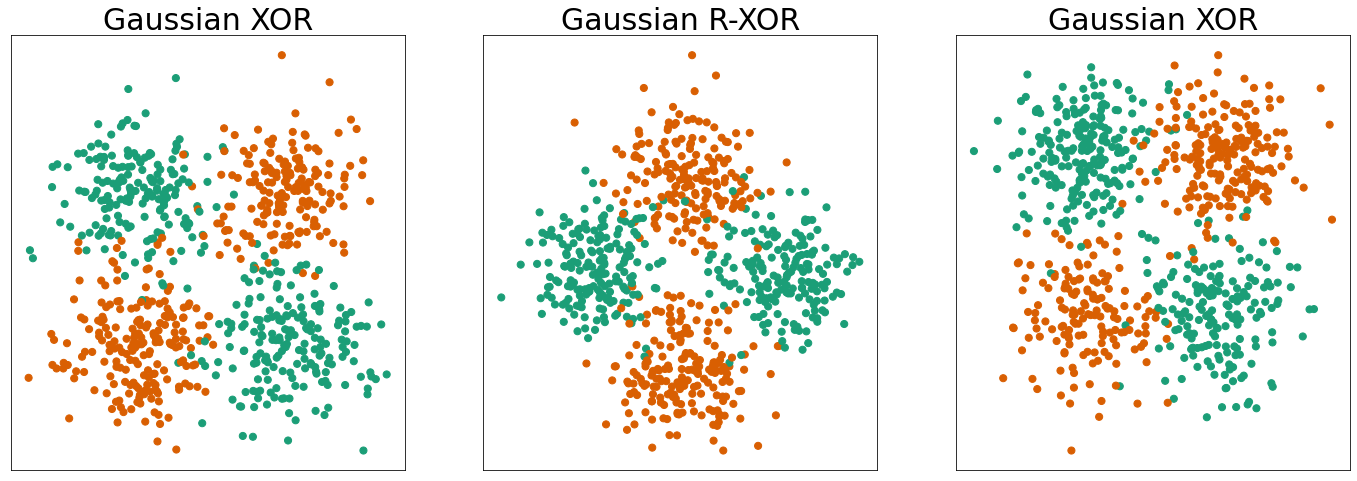

In [12]:
fn.plot_xor_rxor_xor(num_data_points=750)

### Loading the Results
We can visualize the results of experiment 1 by first loading the generalization errors from .txt files stored in `benchmarks/results`

In [13]:
directory = "../benchmarks/results/"
prefixes = ["ht/", "mf/", "sdt/", "sdf/", "synf/"]
rxor_mean_errors = []
for prefix in prefixes:
    xor_error = fn.load_result(directory + prefix + "rxor_exp_xor_error.txt")
    r_xor_error = fn.load_result(directory + prefix + "rxor_exp_r_xor_error.txt")
    rxor_mean_errors.append(xor_error)
    rxor_mean_errors.append(r_xor_error)

### Visualizing the Results 
Now we can plot the results of the XOR, R-XOR, XOR experiment. The plot on the left shows generalization errors for XOR data and the plot on the right shows generalization errors for R-XOR data. The generalization errors are averaged over 50 repetitions of the experiment. 

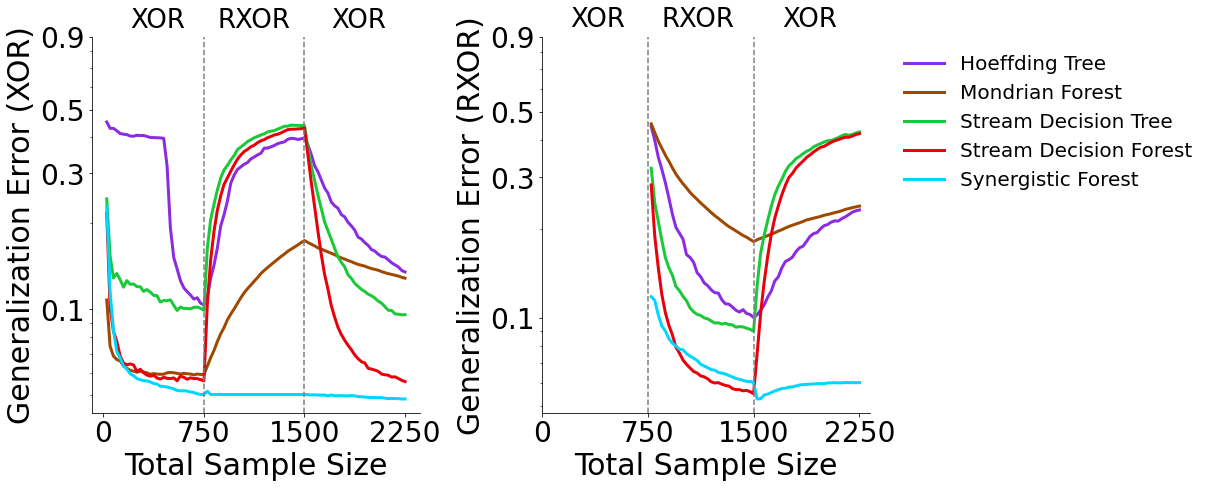

In [14]:
fn.r_xor_plot_error(np.array(rxor_mean_errors))

#### XOR Generalization Error (Left)
SynF, SDF, and MF outperform SDT and HT on XOR data when trained only on XOR data. As RXOR data are introduced, SynF is the only classifier in which performance does not deteriorate. SynF continues to outperform all other classifiers as additional XOR data are added. 

#### R-XOR Generalization Error (Right)
As R-XOR data are introduced, SDT, SDF and SynF outperform HT and MF. As additional XOR data are introduced SDT, SDF, HT, and MF performance approach chance error, whereas SynF outperforms all other classifiers.


## Experiment 2: Gaussian XOR and Gaussian XNOR Simulated Data
In experiment 2, we use Gaussian XOR and Gaussian XNOR simulated data. Gaussian XNOR has the same distribution as Gaussian XOR, but with the class labels rotated 90 degrees. Therefore, XNOR has the same optimal discriminant boundary as XOR. We first introduce 750 samples of XOR, followed by 750 samples of XNOR, followed by 750 additional samples of XOR. Data are introduced in batches of 25 samples at a time.

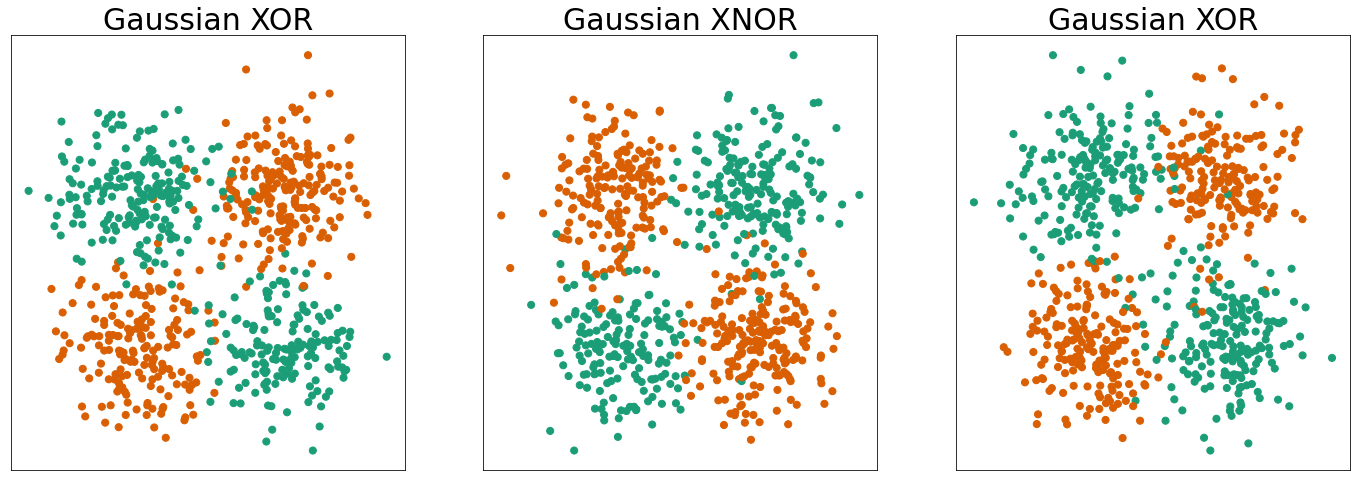

In [15]:
fn.plot_xor_xnor_xor(num_data_points=750)

### Loading the Results 
We can visualize the results of experiment 2 by first loading the generalization errors from .txt files stored in `benchmarks/results`

In [16]:
xnor_mean_errors = []
for prefix in prefixes:
    xor_error = fn.load_result(directory + prefix + "xnor_exp_xor_error.txt")
    xnor_error = fn.load_result(directory + prefix + "xnor_exp_xnor_error.txt")
    xnor_mean_errors.append(xor_error)
    xnor_mean_errors.append(xnor_error)

### Visualizing the Results
Now we can plot the results of the XOR, XNOR, XOR experiment. The plot on the left shows generalization errors for XOR data and the plot on the right shows generalization errors for XNOR data. The generalization errors are averaged over 50 repetitions of the experiment. 

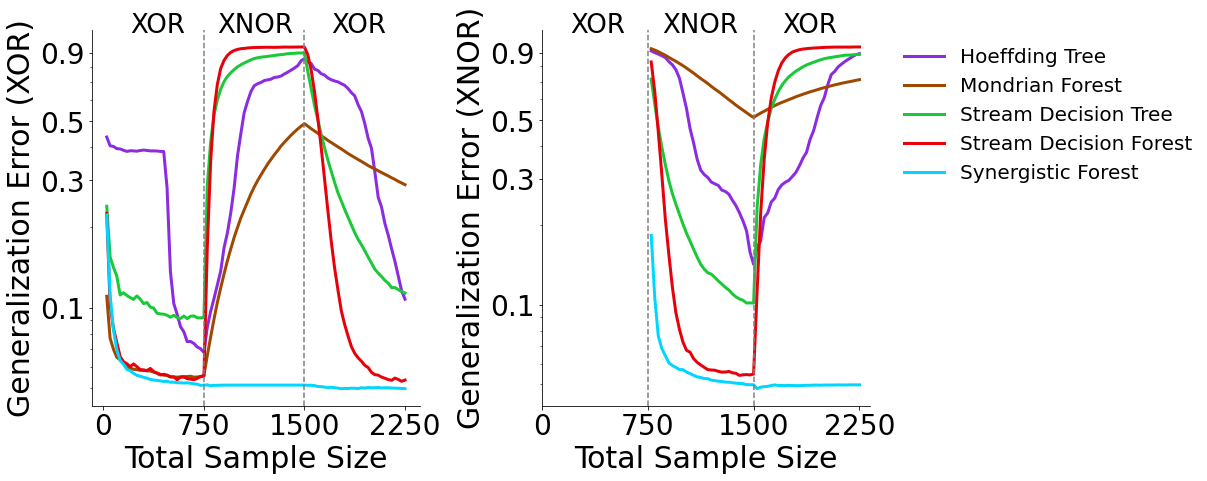

In [17]:
fn.xnor_plot_error(np.array(xnor_mean_errors))

#### XOR Generalization Error (Left)
SynF outperforms all other classifiers. When XNOR data are introduced, SynF is the only classifier which does not deteriorate in performance. Poor performance is expected for all other classifiers when XNOR data are introduced because XNOR has the same optimal discriminant boundary as XOR, but with opposite class labels. SynF is able to leverage past representations to maintain and improve performance whereas all other classifiers must re-learn XNOR from scratch.


#### XNOR Generalization Error (Right)
When tested on XNOR data, SynF and SDF outperform all other classifiers. As XOR data are introduced, SynF again outperforms all other classifiers. 